In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners =[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 100
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


In [4]:
from platform import python_version

print(python_version())

3.6.8


Save these seeds if you want to rerun a scenario
[9675]
log initialized
Average similarity between family members is 0.9860051409106266 at temperature -1
Average similarity between family and home is 0.9923971147906029 at temperature -1
Average similarity between students and their classroom is 0.9903179555212374 at temperature -1
Average similarity between workers is 0.9882733784377535 at temperature -1
Average friend similarity for adults: 0.9845432732250227 for kids: 0.9819766123464047
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuil

avg restaurant similarity 0.8804764865708413
avg restaurant similarity 0.853159064390462
avg restaurant similarity 0.8588054929049078
avg restaurant similarity 0.8633442429793675
avg restaurant similarity 0.891530242216998
avg restaurant similarity 0.8773018435805584
avg restaurant similarity 0.8594018225038038
avg restaurant similarity 0.8615467046120475
avg restaurant similarity 0.8742199877491335
avg restaurant similarity 0.8736475098819113
avg restaurant similarity 0.852003202561793
avg restaurant similarity 0.8769644219382344
avg restaurant similarity 0.8593185218916375
avg restaurant similarity 0.8707031140036335
avg restaurant similarity 0.8392689766198203
avg restaurant similarity 0.8615703884900541
avg restaurant similarity 0.8733941407491191
avg restaurant similarity 0.8559984534997291
avg restaurant similarity 0.86636825679458
avg restaurant similarity 0.8765389996776909
avg restaurant similarity 0.8866460035570308
avg restaurant similarity 0.8844976889540554
avg restaurant 

avg restaurant similarity 0.8762566503335676
avg restaurant similarity 0.8495015163261571
avg restaurant similarity 0.866964979619256
avg restaurant similarity 0.877298605747777
avg restaurant similarity 0.855416072921589
avg restaurant similarity 0.8579851574572261
avg restaurant similarity 0.8459787370076978
avg restaurant similarity 0.8661024199082881
avg restaurant similarity 0.8793407340339433
avg restaurant similarity 0.8638934821226275
avg restaurant similarity 0.8507116438032216
avg restaurant similarity 0.8840480504705613
avg restaurant similarity 0.883753898848039
avg restaurant similarity 0.8541396150793226
avg restaurant similarity 0.8777117922857506
avg restaurant similarity 0.869413537894292
avg restaurant similarity 0.8536178794875868
avg restaurant similarity 0.8683621913216584
avg restaurant similarity 0.8541260207574698
avg restaurant similarity 0.8887641801453808
avg restaurant similarity 0.8446780912939273
avg restaurant similarity 0.8790502057031783
avg restaurant 

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.7140083333333334]
min:
0.7140083333333334
max:
0.7140083333333334
std:
0.0
mean:
0.7140083333333334
median:
0.7140083333333334
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.031419444444444444]
min:
0.031419444444444444
max:
0.031419444444444444
std:
0.0
mean:
0.031419444444444444
median:
0.031419444444444444
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.233925]
min:
0.233925
max:
0.233925
std:
0.0
mean:
0.233925
median:
0.233925
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.005694444444444444]
min:
0.005694444444444444
max:
0.005694444444444444
std:
0.0
mean:
0.005694444444444444
median:
0.005694444444444444
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu:
data: [0.0014333333333333333]
min:
0.001433

(<function dict.items>, <function dict.items>, <function dict.items>)

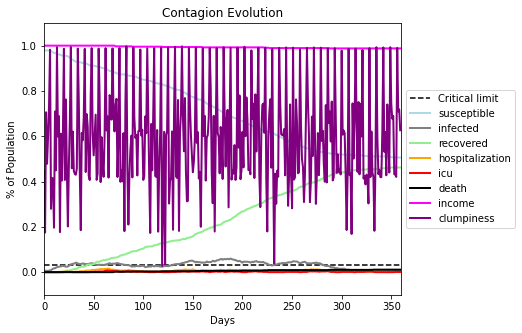

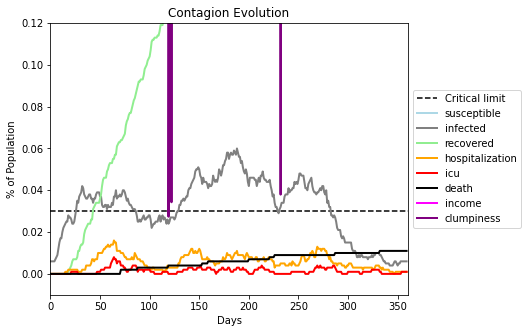

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.980419954239547 at temperature -0.999
Average similarity between family and home is 0.9924526591450437 at temperature -1
Average similarity between students and their classroom is 0.9839025681208138 at temperature -0.999
Average similarity between workers is 0.9868447633158679 at temperature -0.999
Average friend similarity for adults: 0.9841970543656963 for kids: 0.9809771815539845
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding:

avg restaurant similarity 0.9210681035734873
avg restaurant similarity 0.9234524243545186
avg restaurant similarity 0.9260689221579114
avg restaurant similarity 0.9303824071123707
avg restaurant similarity 0.9126464250901078
avg restaurant similarity 0.9402507245090542
avg restaurant similarity 0.9428493205570977
avg restaurant similarity 0.9444105592278084
avg restaurant similarity 0.931306131593488
avg restaurant similarity 0.9178890763761539
avg restaurant similarity 0.9216457173550228
avg restaurant similarity 0.9066373790751652
avg restaurant similarity 0.9005937056843243
avg restaurant similarity 0.9260637678019614
avg restaurant similarity 0.922331932266477
avg restaurant similarity 0.9347028445265291
avg restaurant similarity 0.9322355042410924
avg restaurant similarity 0.9015660454694951
avg restaurant similarity 0.9126950134341861
avg restaurant similarity 0.8981566373349319
avg restaurant similarity 0.919702398246637
avg restaurant similarity 0.897777616582983
avg restaurant

avg restaurant similarity 0.9111773625656543
avg restaurant similarity 0.9084268850421943
avg restaurant similarity 0.9192847269350206
avg restaurant similarity 0.9195550307602436
avg restaurant similarity 0.9417763688589686
avg restaurant similarity 0.9353216910730918
avg restaurant similarity 0.9154106527392327
avg restaurant similarity 0.9128911912056983
avg restaurant similarity 0.9278261883443876
avg restaurant similarity 0.9162628783368475
avg restaurant similarity 0.9181712336154477
avg restaurant similarity 0.9335812112695147
avg restaurant similarity 0.9161871982951026
avg restaurant similarity 0.9215189690077386
avg restaurant similarity 0.9197236646307682
avg restaurant similarity 0.9178170848173448
avg restaurant similarity 0.9309360730133116
avg restaurant similarity 0.9207192149295935
avg restaurant similarity 0.9312915511666877
avg restaurant similarity 0.9271939971111224
avg restaurant similarity 0.9295020887624287
avg restaurant similarity 0.9205648252825241
avg restau

(<function dict.items>, <function dict.items>, <function dict.items>)

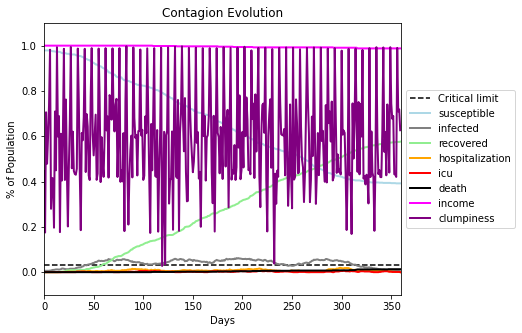

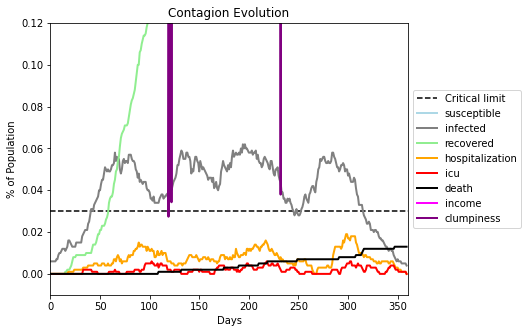

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.045346067456969716 at temperature 1
Average similarity between family and home is 0.9925806281120655 at temperature -1
Average similarity between students and their classroom is 0.17464054630173997 at temperature 1
Average similarity between workers is 0.11159341449022768 at temperature 1
Average friend similarity for adults: 0.13376915095534203 for kids: 0.16008131049872967
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 unit

avg restaurant similarity 0.13120720909928496
avg restaurant similarity 0.10301258490750319
avg restaurant similarity 0.09593564605728679
avg restaurant similarity 0.09216196544911207
avg restaurant similarity 0.11048734382172563
avg restaurant similarity 0.07701465051750095
avg restaurant similarity 0.10169710093364351
avg restaurant similarity 0.08345950834212322
avg restaurant similarity 0.08828828472026021
avg restaurant similarity 0.09281953031333419
avg restaurant similarity 0.07395321747187258
avg restaurant similarity 0.10258052106907317
avg restaurant similarity 0.09840986286034475
avg restaurant similarity 0.06667541206630195
avg restaurant similarity 0.07934380563063695
avg restaurant similarity 0.08071119937048742
avg restaurant similarity 0.0803784519530269
avg restaurant similarity 0.1130677947713905
avg restaurant similarity 0.08288931032384834
avg restaurant similarity 0.07411056514751593
avg restaurant similarity 0.09598012299928699
avg restaurant similarity 0.09672595

avg restaurant similarity 0.08091956257207075
avg restaurant similarity 0.12171633565891214
avg restaurant similarity 0.0864671388838333
avg restaurant similarity 0.07931190750516223
avg restaurant similarity 0.09188840850291059
avg restaurant similarity 0.08224551600364971
avg restaurant similarity 0.11299292629869948
avg restaurant similarity 0.06988262437006738
avg restaurant similarity 0.0744798106778333
avg restaurant similarity 0.08511833013385042
avg restaurant similarity 0.0949117116815791
avg restaurant similarity 0.11316913018119186
avg restaurant similarity 0.07926431418635989
avg restaurant similarity 0.09499009602950798
avg restaurant similarity 0.0967378901768431
avg restaurant similarity 0.09964454857946169
avg restaurant similarity 0.07930123693260478
avg restaurant similarity 0.1279677647797032
avg restaurant similarity 0.10260075099950998
avg restaurant similarity 0.1122553931754698
avg restaurant similarity 0.07277996579882487
avg restaurant similarity 0.099552643161

(<function dict.items>, <function dict.items>, <function dict.items>)

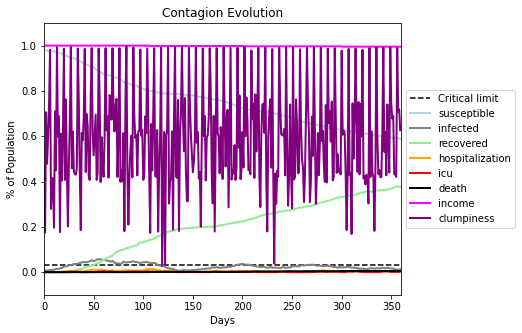

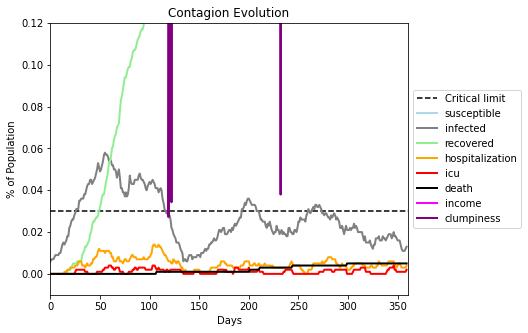

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.35250001518086205 at temperature 0
Average similarity between family and home is 0.992431635684071 at temperature -1
Average similarity between students and their classroom is 0.433509692567523 at temperature 0
Average similarity between workers is 0.3723427147541962 at temperature 0
Average friend similarity for adults: 0.35552031733467815 for kids: 0.3863319416819109
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (eac

avg restaurant similarity 0.19298811429257692
avg restaurant similarity 0.17311313773882692
avg restaurant similarity 0.22313128871737745
avg restaurant similarity 0.18209655354504065
avg restaurant similarity 0.18276312256914085
avg restaurant similarity 0.17606911249402815
avg restaurant similarity 0.19748311661491033
avg restaurant similarity 0.18308089891251025
avg restaurant similarity 0.17262717651300633
avg restaurant similarity 0.22219743992315302
avg restaurant similarity 0.19839176158334632
avg restaurant similarity 0.2428809528340198
avg restaurant similarity 0.20958826917752735
avg restaurant similarity 0.22868952159960612
avg restaurant similarity 0.2599020328396071
avg restaurant similarity 0.2263216843875781
avg restaurant similarity 0.20298922268986958
avg restaurant similarity 0.2204115493286449
avg restaurant similarity 0.19282720763279793
avg restaurant similarity 0.21154224231892232
avg restaurant similarity 0.16784571667448567
avg restaurant similarity 0.1602045785

avg restaurant similarity 0.21943740253515245
avg restaurant similarity 0.22479614241899018
avg restaurant similarity 0.2176394969378159
avg restaurant similarity 0.23588070605166467
avg restaurant similarity 0.20491624946598114
avg restaurant similarity 0.1466492143010661
avg restaurant similarity 0.20515779515233473
avg restaurant similarity 0.23991843804738072
avg restaurant similarity 0.16811891766068823
avg restaurant similarity 0.22969435714925382
avg restaurant similarity 0.18677753393906033
avg restaurant similarity 0.2145603184515864
avg restaurant similarity 0.2121777618973916
avg restaurant similarity 0.18411594778051593
avg restaurant similarity 0.12272328434603623
avg restaurant similarity 0.18938263782649192
avg restaurant similarity 0.19338717078799536
avg restaurant similarity 0.13942084056722592
avg restaurant similarity 0.19102843286030033
avg restaurant similarity 0.2034178876210233
avg restaurant similarity 0.23842432930078022
avg restaurant similarity 0.16114214730

(<function dict.items>, <function dict.items>, <function dict.items>)

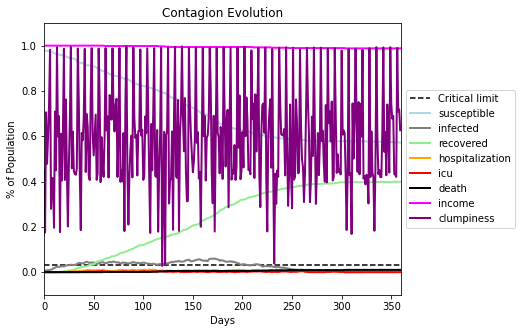

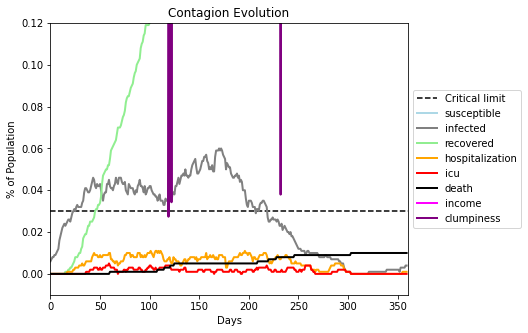

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.7126281619958719 at temperature -0.9
Average similarity between family and home is 0.992803808280724 at temperature -1
Average similarity between students and their classroom is 0.5254214397899432 at temperature -0.9
Average similarity between workers is 0.5231150034969858 at temperature -0.9
Average friend similarity for adults: 0.7385183712375133 for kids: 0.6223193003470294
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 un

avg restaurant similarity 0.2758624271661806
avg restaurant similarity 0.30129216627340555
avg restaurant similarity 0.2715248829069486
avg restaurant similarity 0.2454366596387902
avg restaurant similarity 0.27176951625022644
avg restaurant similarity 0.16453966014458932
avg restaurant similarity 0.3151103838042515
avg restaurant similarity 0.25070682946725903
avg restaurant similarity 0.2268266233973576
avg restaurant similarity 0.2520780085008637
avg restaurant similarity 0.3065897206358799
avg restaurant similarity 0.30835952681040235
avg restaurant similarity 0.2973103773547576
avg restaurant similarity 0.26480945871919453
avg restaurant similarity 0.2859211456442364
avg restaurant similarity 0.27449842254561263
avg restaurant similarity 0.33381752282976307
avg restaurant similarity 0.2886051194087952
avg restaurant similarity 0.24033065493714073
avg restaurant similarity 0.2218434281315428
avg restaurant similarity 0.24630375476932337
avg restaurant similarity 0.32378962802565353

avg restaurant similarity 0.2870493975617733
avg restaurant similarity 0.2407930801439019
avg restaurant similarity 0.24653417919296436
avg restaurant similarity 0.3211157700453693
avg restaurant similarity 0.27722974461202343
avg restaurant similarity 0.22930637856073366
avg restaurant similarity 0.28809743261794024
avg restaurant similarity 0.3035467301122643
avg restaurant similarity 0.23282114457712633
avg restaurant similarity 0.23790034157548448
avg restaurant similarity 0.2750344100121379
avg restaurant similarity 0.3293070593956616
avg restaurant similarity 0.22236911723073438
avg restaurant similarity 0.20957610045481498
avg restaurant similarity 0.3139226083671217
avg restaurant similarity 0.1909453751226777
avg restaurant similarity 0.24386547777566778
avg restaurant similarity 0.25332462137068845
avg restaurant similarity 0.2738522103001613
avg restaurant similarity 0.2512253161994092
avg restaurant similarity 0.20852366668066794
avg restaurant similarity 0.2371110747360652

(<function dict.items>, <function dict.items>, <function dict.items>)

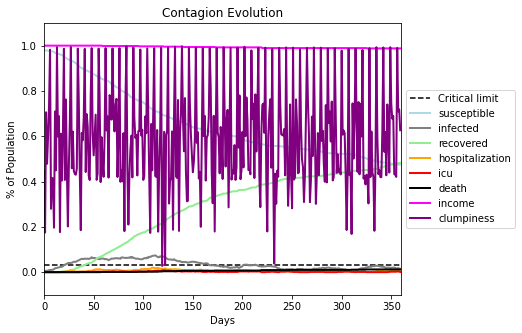

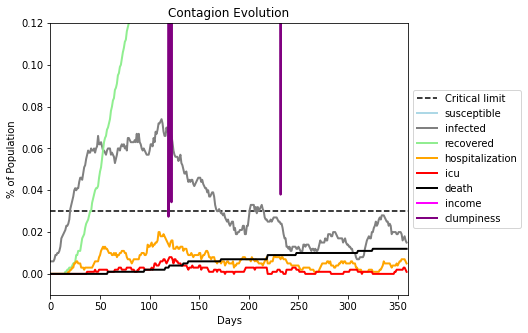

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])